# CS5002 Project 1 Part 1 

Xiaoyuan Lu  
NUID: 002034691

## Section 1: Derivatives and Optimization

**Practice**
- $f(x) = a$

  $$
  f'(x) = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h} = \lim_{h \to 0} \frac{a - a}{h} = 0
  $$

- $f(x) = ax$

  $$
  f'(x) = \lim_{h \to 0} \frac{a(x + h) - ax}{h} = \lim_{h \to 0} \frac{ax + ah - ax}{h} = \lim_{h \to 0} \frac{ah}{h} = a
  $$

- $f(x) = ax^2$

  $$
  f'(x) = \lim_{h \to 0} \frac{a(x + h)^2 - ax^2}{h} = \lim_{h \to 0} \frac{a(x^2 + 2xh + h^2) - ax^2}{h} \\
  = \lim_{h \to 0} \frac{ax^2 + 2ahx + ah^2 - ax^2}{h} = \lim_{h \to 0} \frac{2ahx + ah^2}{h} \\
  = \lim_{h \to 0} \left(2ax + ah\right) = 2ax
  $$

- $f(x) = ax^2 + ax$

  $$
  f'(x) = \frac{d}{dx}(ax^2 + ax) = \frac{d}{dx}(ax^2) + \frac{d}{dx}(ax) = 2ax + a
  $$

- $f(x) = g(x) + p(x)$

  $$
  f'(x) = \frac{d}{dx}(g(x) + p(x)) = \frac{d}{dx}g(x) + \frac{d}{dx}p(x) = g'(x) + p'(x)
  $$

## Section 2: Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 2.1 Quadratic Functions

**Part1**

In [2]:
# Define function f1 and its derivative
def f1(x):
    return x**2

def deriv_f1(x):
    return 2 * x
    
# Define function f2 and its derivative
def f2(x):
    return x**2 - 2 * x + 3

def deriv_f2(x):
    return 2 * x - 2

In [3]:
# Gradient Descent implementation for one variable
def gradient_descent(df, x0=3, alpha=0.1, epsilon=0.001):
    """
    Perform gradient descent to find the optimization of a function

    Parameters:
    df: The derivative of the function to be optimized
    x0 : The initial point to start gradient descent
    alpha: The step size
    epsilon: The convergence tolerance

    Returns:
    x_new: The optimized value of x
    iter: The number of iterations
    """
    x = x0
    iter = 0
    iter_max = 1000

    while iter < iter_max:
        x_new = x - alpha * df(x)  # Gradient descent formula
        if abs(x_new - x) < epsilon:
            break
        x = x_new  # Update x value
        iter += 1
    return x, iter

In [4]:
# Plotting function for 1D functions and minimum point
def plot_opt(f, df, title):
    """
    Plot a function and mark the optimal x found by gradient descent

    Parameters:
    f : The function to be plotted
    df : The derivative function
    title : The title of the plot
    """
    x0 = 3
    alpha = 0.1
    epsilon = 0.001

    x_vals = np.linspace(-5, 5, 400)
    y_vals = f(x_vals)
    plt.figure()
    plt.plot(x_vals, y_vals, label='Function')

    optimal_x, _ = gradient_descent(df, x0, alpha, epsilon)
    plt.scatter(optimal_x, f(optimal_x), color='red', label='Optimal x')

    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

**Part 2 - 4**

**(2) Varying $x_0$**
- For $f_1(x) = x^2$:  
  With $x_0 = 3$, the result is $x \approx 0.0046$  
  With $x_0 = -3$, the result is $x \approx -0.0046$

- For $f_2(x) = x^2 - 2x + 3$:  
  With $x_0 = 3$, the result is $x \approx 1.0048$  
  With $x_0 = -3$, the result is $x \approx 0.9950$

The results converge to approximately the same optimal value regardless of the initial value $x_0$.  

**(3) Varying $\alpha$**

$\alpha = 1$
- The algorithm fails to converge.  
- For both functions, the output is $x = 3.0000$ after the maximum 1000 iterations.  

$\alpha = 0.001$  
- The algorithm converges slowly.  
- For $f_1(x) = x^2$, it returns $x \approx 0.5000$ after 895 iterations.  
- For $f_2(x) = x^2 - 2x + 3$, it returns $x \approx 1.4995$ after 693 iterations.  
- The step size is small enough to prevent divergence, but convergence is very slow and not very accurate.  

$\alpha = 0.0001$  
- The algorithm terminates immediately with 0 iterations.  
- For both functions, it returns $x = 3.0000$, which is the initial value.  
- This likely happens because the gradient at the starting point is very small, causing the algorithm to believe it has already converged.  

**(4) Varying $\epsilon$**  

$\epsilon = 0.1$
- For $f_1(x) = x^2$, the minimum is found at $x \approx 0.4027$ after 9 iterations.
- For $f_2(x) = x^2 - 2x + 3$, the minimum is found at $x \approx 1.4194$ after 7 iterations.
- The algorithm stops early due to the high threshold. The solution is still far from the true minimum.

$\epsilon = 0.01$
- For $f_1(x)$, the result is $x \approx 0.0432$ after 19 iterations.
- For $f_2(x)$, the result is $x \approx 1.0450$ after 17 iterations.
- The result is more accurate than with $\epsilon = 0.1$, and convergence is still reasonably fast.

$\epsilon = 0.0001$
- For $f_1(x)$, the result is $x \approx 0.0005$ after 39 iterations.
- For $f_2(x)$, the result is $x \approx 1.0004$ after 38 iterations.
- The solution is very close to the true minimum, with more iterations required.

In [5]:
# Perturbation analysis for x0, alpha, epsilon
def perturbation_analysis():

    print("----Testing with different x0------")
    for x0 in [3, -3]:
        for f, df, name in [(f1, deriv_f1, "f1"), (f2, deriv_f2, "f2")]:
            opt_x, iters = gradient_descent(df, x0, 0.1, 0.001)
            print(f"{name} with x0={x0}: Optimal x = {opt_x:.4f}, Iterations = {iters}")

    print("\n----Testing with different alpha----")
    for alpha in [1, 0.001, 0.0001]:
        for f, df, name in [(f1, deriv_f1, "f1"), (f2, deriv_f2, "f2")]:
            opt_x, iters = gradient_descent(df, 3, alpha, 0.001)
            print(f"{name} with alpha={alpha}: Optimal x = {opt_x:.4f}, Iterations = {iters}")

    print("\n----Testing with different epsilon----")
    for epsilon in [0.1, 0.01, 0.0001]:
        for f, df, name in [(f1, deriv_f1, "f1"), (f2, deriv_f2, "f2")]:
            opt_x, iters = gradient_descent(df, 3, 0.1, epsilon)
            print(f"{name} with epsilon={epsilon}: Optimal x = {opt_x:.4f}, Iterations = {iters}")

### 2.2 More Complex Functions

**Part 1**

In [6]:
# Plotting f3 function
def plot_f3():
    """
    Plot the function f3(x) = sin(x) + cos(sqrt(2) * x) over the interval [0, 10]
    """
    x_vals = np.linspace(0, 10, 500)
    y_vals = f3(x_vals)
    plt.figure()
    plt.plot(x_vals, y_vals, label='f3(x)')
    plt.title('Function f3(x) = sin(x) + cos(sqrt(2)x)')
    plt.xlabel('x')
    plt.ylabel('f3(x)')
    plt.grid(True)
    plt.legend()
    plt.show()

**Part 2**

In [7]:
# Define function f3 and its derivative
def f3(x):
    return np.sin(x) + np.cos(np.sqrt(2) * x)

def deriv_f3(x):
    return np.cos(x) - np.sqrt(2) * np.sin(np.sqrt(2) * x)

In [8]:
# Plotting function f3 and its multiple local minimum
def plot_opt_f3(f, df, title):
    """
    Use gradient descent to find local minima of f3(x) starting from different initial points
    Plot the function and the local minima points
    """
    x0_values = [1, 4, 5, 7]
    alpha = 0.1
    epsilon = 0.0001

    x_vals = np.linspace(0, 10, 500)
    y_vals = f(x_vals)
    plt.figure()
    plt.plot(x_vals, y_vals, label='f3(x)')

    for x0 in x0_values:
        opt_x, _ = gradient_descent(df, x0, alpha, epsilon)
        plt.scatter(opt_x, f(opt_x), label=f'x0={x0}')

    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('f3(x)')
    plt.grid(True)
    plt.legend()
    plt.show()

## Section 3: Derivative Approximation for Functions of One Variable

**Part1**

The results obtained using the approximate derivative are consistent with those using the exact derivative.

In [9]:
# Approximate Derivative Function
def approx_derivative(f, x, h=1e-6):
    """
    Approximate derivative function

    Parameters:
    f: The original function to differentiate
    x: The point at which to approximate the derivative
    h: A small step value, default is 1e-6

    Returns:
    float: the approximate derivative at point x
    """
    return (f(x + h) - f(x)) / h

**Part2**

The results closely match those of the original implementation.

In [10]:
def gradient_descent_approx(f, x0=3, alpha=0.1, epsilon=0.001):
    """
    Use approximate derivative function to perform gradient descent to find the optimization of a function

    Parameters:
    f: The function to be optimized
    x0 : The initial point to start gradient descent
    alpha: The step size
    epsilon: The convergence tolerance

    Returns:
    x: The optimized value of x
    iter: The number of iterations
    """
    x = x0
    iter = 0
    iter_max = 1000

    while iter < iter_max:
        x_new = x - alpha * approx_derivative(f, x)
        if abs(x_new - x) < epsilon:
            break
        x = x_new
        iter += 1
    return x, iter

## Section 4: Gradient Descent for Functions of Two Variables

**Part 1**

In [11]:
# Define the two-variable function
def f_multi(x, y):
    return x**2 + y**2

In [12]:
def approx_partial_deriv(f, x, y, var='x', h=1e-6):
    """
        Approximate the partial derivative of a two-variable function at a given point

        Parameters:
        f : The two variables function to differentiate
        x : The x-coordinate at which to approximate the partial derivative
        y : The y-coordinate at which to approximate the partial derivative
        var : Specifies the variable with respect to which the partial derivative is taken
        h : A small step value, default is 1e-6

        Returns:
        float: The approximate partial derivative at the point (x, y) with respect to the specified variable
        """
    if var == 'x':
        return (f(x + h, y) - f(x, y)) / h
    else:
        return (f(x, y + h) - f(x, y)) / h

**Part2**

In [13]:
def gradient_descent_2d(f, x0=3, y0=3, alpha=0.1, epsilon=0.001):
    """
    Perform gradient descent to find the optimization of a two-variable function

    Parameters:
    f: The function to be optimized
    x0: The x-coordinate of the initial point to start gradient descent
    y0: The x-coordinate of the initial point to start gradient descent

    alpha: The step size
    epsilon: The convergence tolerance

    Returns:
    x: The x-coordinate of the optimized point
    y: The y-coordinate of the optimized point
    """
    x, y = x0, y0
    iter = 0
    iter_max = 1000

    while iter < iter_max:
        dx = approx_partial_deriv(f, x, y, 'x')
        dy = approx_partial_deriv(f, x, y, 'y')
        x_new = x - alpha * dx
        y_new = y - alpha * dy
        if abs(x_new - x) < epsilon and abs(y_new - y) < epsilon:
            break
        x, y = x_new, y_new
        iter += 1
    return x, y

In [14]:
def plot_opt_2d(f, title):
    """
    Plot a two-derivative function and mark the optimal point found by gradient descent

    Parameters:
    f : The function to be plotted
    title : The title of the plot
    """
    x_vals = y_vals = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = f(X, Y)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

    opt_x, opt_y = gradient_descent_2d(f_multi, 3, 3, 0.1, 0.001)
    ax.scatter(opt_x, opt_y, f_multi(opt_x, opt_y), color='r', s=50)
    print(f"2D minimum found at (x, y) = ({opt_x:.4f}, {opt_y:.4f})")

    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')
    plt.show()

## Section 5: Report

In this project, I first implemented gradient descent for single-variable functions.  
I defined functions $f(x)$, their derivative function $f'(x)$, and the Gradient Descent algorithim using $f'(x)$.

Testing with different values of $x_0$, $\alpha$, and $\epsilon$, I learned that:
- Large $\alpha$ may cause divergence; small $\alpha$ slows convergence.
- $x_0$ affects which local minimum is reached.
- Smaller $\epsilon$ increases precision but requires more iterations.

I also implemented an approximate derivative function. This approximation allows the gradient descent algorithm to work even when derivative function was not available.

Finally, I extended the algorithm to handle functions of two variables. I approximated partial derivatives.
The method successfully converged to the global minimum of $f(x, y) = x^2 + y^2$.


## Main Function

In [15]:
def main():
    # Section 2.1 Part 1: Gradient Descent on simple functions
    print("\nSection 2.1 Part 1: Gradient Descent on simple functions")
    opt1, iter1 = gradient_descent(deriv_f1)
    plot_opt(f=f1, df=deriv_f1, title="Gradient Descent on f1(x) = x^2")
    print(f"f1(x) = x^2: Minimum found at x = {opt1} after {iter1} iterations.")

    opt2, iter2 = gradient_descent(deriv_f2)
    plot_opt(f=f2, df=deriv_f2, title="Gradient Descent on f2(x) = x^2 - 2x + 3")
    print(f"f2(x) = x^2 - 2x + 3: Minimum found at x = {opt2} after {iter2} iterations.")

    # Section 2.1 Part 2-4: Perturbation analysis
    print("\nSection 2.1 Part 2-4: Perturbation analysis for x0, alpha, epsilon:")
    perturbation_analysis()

    # Section 2.2: Complex function analysis
    print("\nSection 2.2: Complex function analysis")
    plot_f3()
    plot_opt_f3(f=f3, df=deriv_f3, title='Gradient Descent on f3 with Different Starting Points')

    # Section 3 Part 1: Derivative Approximation Function test
    print("\nSection 3 Part1: Derivative Approximation Function test")
    deriv_approx_f1_0 = approx_derivative(f=f1, x=0)
    print(f"f1(x): The approximate derivative value at x=0 is {deriv_approx_f1_0:.4f}")
    deriv_approx_f2_1 = approx_derivative(f=f2, x=1)
    print(f"f2(x): The approximate derivative value at x=1 is {deriv_approx_f1_0:.4f}")

    # Section 3 Part 2: Gradient Descent using Derivative Approximation Function
    print("\nSection 3 Part2: Gradient Descent using Derivative Approximation Function")
    opt1_aprox, iter1_aprox = gradient_descent_approx(f1)
    print(f"f1(x) = x^2: Minimum found at x = {opt1_aprox} after {iter1_aprox} iterations.")
    opt2_aprox, iter2_aprox = gradient_descent_approx(f2)
    print(f"f2(x) = x^2 - 2x + 3: Minimum found at x = {opt2_aprox} after {iter2_aprox} iterations.")


    # Section 4: Two-variable function optimization
    print("\nSection 4: Two-variable function optimization")
    plot_opt_2d(f=f_multi, title="Gradient Descent on f(x, y) = x^2 + y^2")


Section 2.1 Part 1: Gradient Descent on simple functions


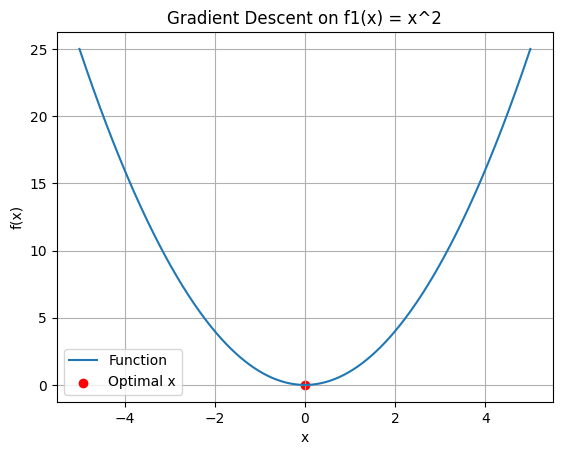

f1(x) = x^2: Minimum found at x = 0.004642275147320177 after 29 iterations.


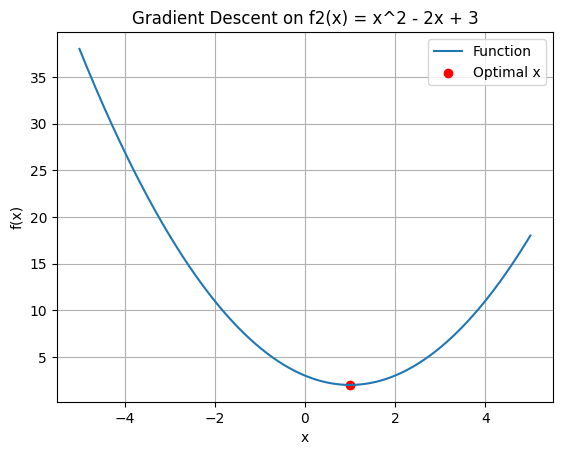

f2(x) = x^2 - 2x + 3: Minimum found at x = 1.0048357032784585 after 27 iterations.

Section 2.1 Part 2-4: Perturbation analysis for x0, alpha, epsilon:
----Testing with different x0------
f1 with x0=3: Optimal x = 0.0046, Iterations = 29
f2 with x0=3: Optimal x = 1.0048, Iterations = 27
f1 with x0=-3: Optimal x = -0.0046, Iterations = 29
f2 with x0=-3: Optimal x = 0.9950, Iterations = 30

----Testing with different alpha----
f1 with alpha=1: Optimal x = 3.0000, Iterations = 1000
f2 with alpha=1: Optimal x = 3.0000, Iterations = 1000
f1 with alpha=0.001: Optimal x = 0.5000, Iterations = 895
f2 with alpha=0.001: Optimal x = 1.4995, Iterations = 693
f1 with alpha=0.0001: Optimal x = 3.0000, Iterations = 0
f2 with alpha=0.0001: Optimal x = 3.0000, Iterations = 0

----Testing with different epsilon----
f1 with epsilon=0.1: Optimal x = 0.4027, Iterations = 9
f2 with epsilon=0.1: Optimal x = 1.4194, Iterations = 7
f1 with epsilon=0.01: Optimal x = 0.0432, Iterations = 19
f2 with epsilon=0.01:

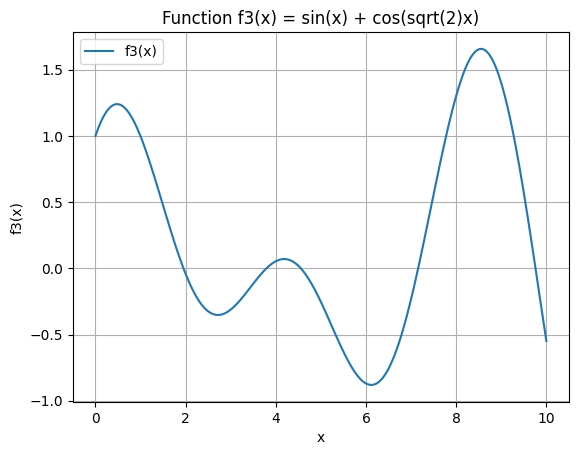

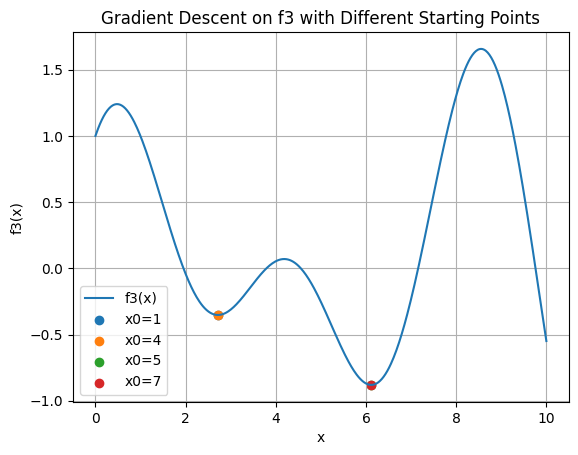


Section 3 Part1: Derivative Approximation Function test
f1(x): The approximate derivative value at x=0 is 0.0000
f2(x): The approximate derivative value at x=1 is 0.0000

Section 3 Part2: Gradient Descent using Derivative Approximation Function
f1(x) = x^2: Minimum found at x = 0.004641775921016148 after 29 iterations.
f2(x) = x^2 - 2x + 3: Minimum found at x = 1.004835204534757 after 27 iterations.

Section 4: Two-variable function optimization
2D minimum found at (x, y) = (0.0046, 0.0046)


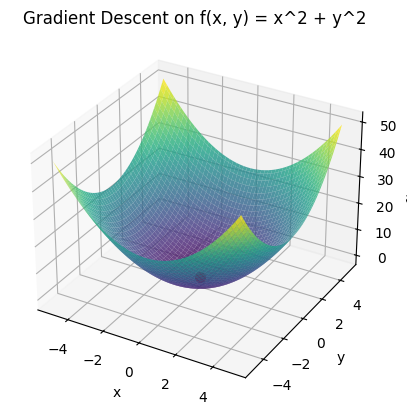

In [16]:
main()